In [ ]:
!python3 -m pip install umap-learn

In [82]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.offsetbox as offsetbox
from scipy.stats import mode
from sklearn.datasets import load_digits

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD # LSA

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from umap import UMAP

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import confusion_matrix

In [113]:
def cut(data, target, size):
    X_, X, y_, y = train_test_split(data, target, test_size=size, random_state=42, stratify=target)
    return X, y


def show_10(X, y):
    fig, axes = plt.subplots(1, 8, figsize=(10,4))
    for x, d, ax in zip(X, y, axes.flat):
        ax.set(title=d, xticks=[], yticks=[])
        ax.imshow((16-x).reshape((8,8)), cmap='gray')


def scatter_2dim(X_projected, y, title):
    plt.figure(figsize=(8,5))
    plt.scatter(X_projected[:,0], X_projected[:,1], c=y)
    plt.title(title)
    plt.colorbar();


def show_report(X, y, X_projected, clusters):
    
    p = np.zeros_like(clusters)
    for c in range(10):
        if np.sum(clusters == c):
            p[clusters == c] = mode(y[clusters == c])[0][0]
    
    # for c in range(10): p[clusters==c] = np.argmax(np.bincount(y[clusters==c]))

    print(f'X.shape: {X.shape}')
    print(f'X_projected.shape: {X_projected.shape}')

    print(f'accuracy_score: {accuracy_score(y, p):.3f}')
    # print(f"precision_score: {precision_score(y, p, average='macro'):.3f}")
    # print(f"recall_score: {recall_score(y, p, average='macro'):.3f}")
    # print(f"f1_score: {f1_score(y, p, average='macro'):.3f}")
    
    print(f'silhouette_score: {silhouette_score(X_projected, clusters):.3f}')
    print(f'homogeneity_score: {homogeneity_score(y, p):.3f}')
    print(f'completeness_score: {completeness_score(y, p):.3f}')
    print(f'v_measure_score: {v_measure_score(y, p):.3f}')

    mat = confusion_matrix(y, p)
    plt.figure(figsize=(4,4))
    sns.heatmap(mat.T, square=True, cmap='OrRd') # annot=True, linewidths=.5
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.title('confusion matrix')

    fig, axes = plt.subplots(1, 10, figsize=(8,2))
    fig.patch.set_visible(False)
    for c, ax in enumerate(axes.flat):
        if np.sum(clusters == c):
            d = mode(y[clusters == c])[0][0]
            x = X[clusters == c].mean(axis=0)
            ax.axis('off')
            ax.set(title=d, xticks=[], yticks=[])
            ax.imshow(16 - x.reshape((8,8)), cmap='gray')
    # for ax in axes.flat: fig.delaxes(ax)
    fig.suptitle("clusters' centers");

    
def plot_components(data):
    
    thumb_frac = 0.05
    images = data.reshape((-1, 8, 8))
    model = UMAP(n_components=2, random_state=42)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    ax = ax or plt.gca()
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2: continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap='gray_r'),proj[i])
            ax.add_artist(imagebox)

X.shape: (1797, 64)  y.shape: (1797,)


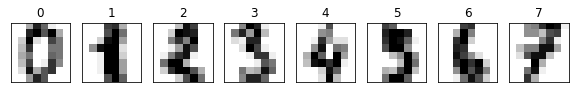

In [76]:
digits = load_digits()
X, y = digits.data, digits.target
print(f'X.shape: {X.shape}  y.shape: {y.shape}')
show_10(X, y)

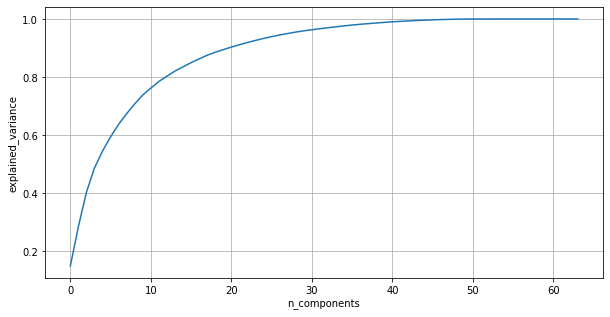

In [77]:
pca = PCA(n_components=64).fit(X)
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.xlabel('n_components')
plt.ylabel('explained_variance')
plt.grid();

X.shape: (1797, 64)
X_projected.shape: (1797, 10)
X_reconstructed.shape: (1797, 64)


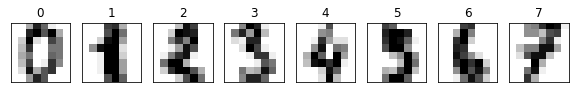

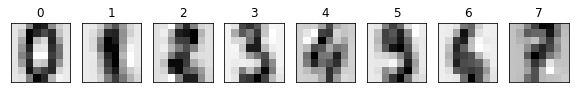

In [79]:
pca = PCA(n_components=10).fit(X)
X_projected = pca.transform(X)
X_reconstructed = pca.inverse_transform(X_projected)

print(f'X.shape: {X.shape}')
print(f'X_projected.shape: {X_projected.shape}')
print(f'X_reconstructed.shape: {X_reconstructed.shape}')

show_10(X, y)
show_10(X_reconstructed, y)

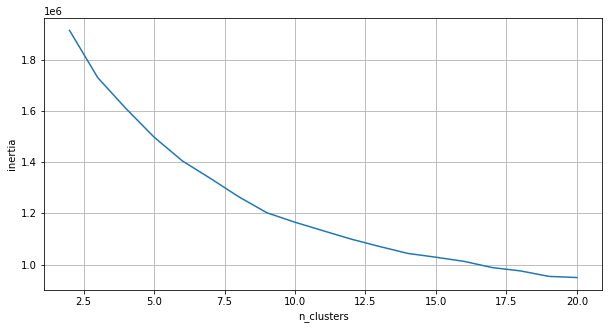

In [80]:
# elbow rule :)
n_clusters = range(2,21)
inertia = [KMeans(n_clusters=n).fit(X).inertia_ for n in n_clusters]
plt.figure(figsize=(10,5))
plt.plot(n_clusters, inertia)
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.grid();

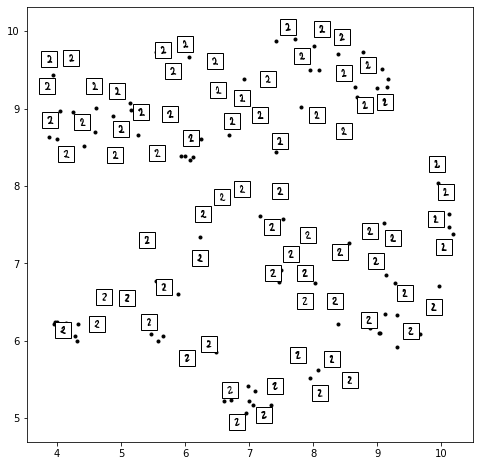

In [118]:
plot_components(X[y == 2])

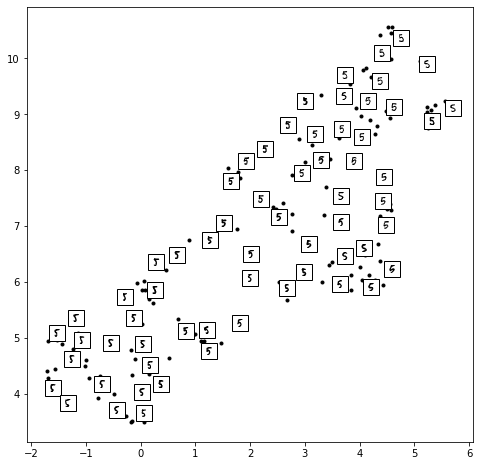

In [119]:
plot_components(X[y == 5])

CPU times: user 155 ms, sys: 307 ms, total: 463 ms
Wall time: 143 ms


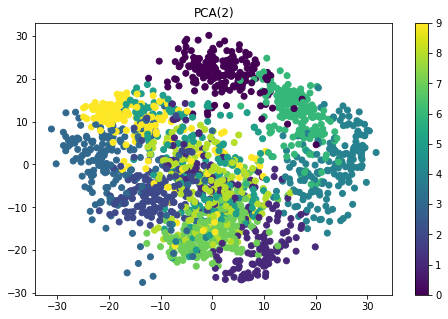

In [548]:
%%time
pca = PCA(n_components=2)
X_projected = pca.fit_transform(X)
scatter_2dim(X_projected, y, 'PCA(2)')

CPU times: user 154 ms, sys: 205 ms, total: 359 ms
Wall time: 114 ms


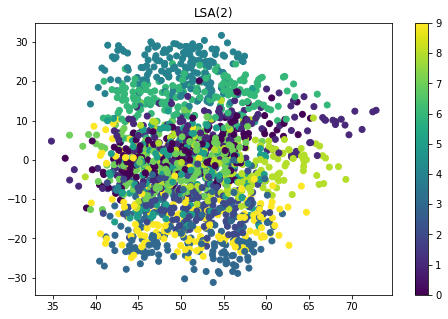

In [547]:
%%time
svd = TruncatedSVD(n_components=2)
X_projected = svd.fit_transform(X)
scatter_2dim(X_projected, y, 'LSA(2)')

CPU times: user 17.2 s, sys: 235 ms, total: 17.4 s
Wall time: 5.53 s


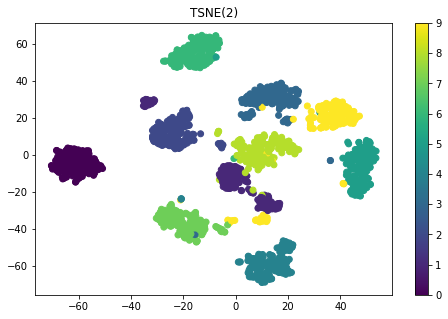

In [538]:
%%time
tsne = TSNE(n_components=2)
X_projected = tsne.fit_transform(X)
scatter_2dim(X_projected, y, 'TSNE(2)')

CPU times: user 12.6 s, sys: 386 ms, total: 13 s
Wall time: 10.4 s


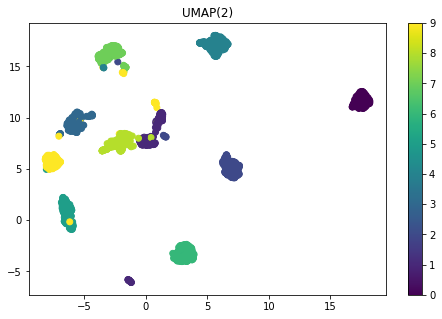

In [569]:
%%time
umap = UMAP(n_components=2)
X_projected = umap.fit_transform(X)
scatter_2dim(X_projected, y, 'UMAP(2)')

CPU times: user 18.9 s, sys: 563 ms, total: 19.4 s
Wall time: 6.59 s


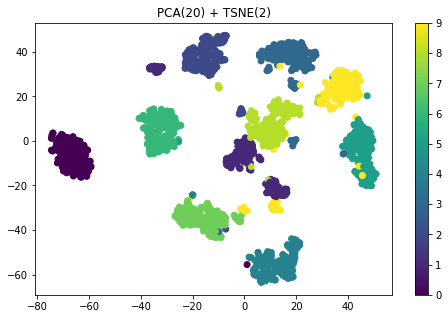

In [532]:
%%time
pca = PCA(n_components=20).fit(X)
X_projected = pca.transform(X)
tsne = TSNE(n_components=2)
X_projected = tsne.fit_transform(X_projected)
scatter_2dim(X_projected, y, 'PCA(20) + TSNE(2)')

CPU times: user 2min 23s, sys: 2min 36s, total: 5min
Wall time: 1min 19s


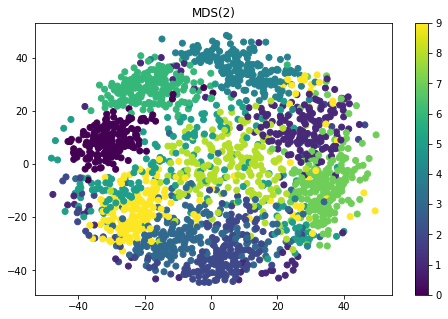

In [533]:
%%time
mds = MDS(n_components=2)
X_projected = mds.fit_transform(X)
scatter_2dim(X_projected, y, 'MDS(2)')

CPU times: user 405 ms, sys: 268 ms, total: 673 ms
Wall time: 314 ms


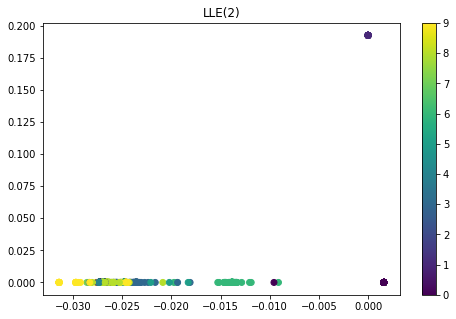

In [549]:
%%time
lle = LocallyLinearEmbedding(n_components=2)
X_projected = lle.fit_transform(X)
scatter_2dim(X_projected, y, 'LLE(2)')

CPU times: user 1.96 s, sys: 522 ms, total: 2.49 s
Wall time: 1.78 s


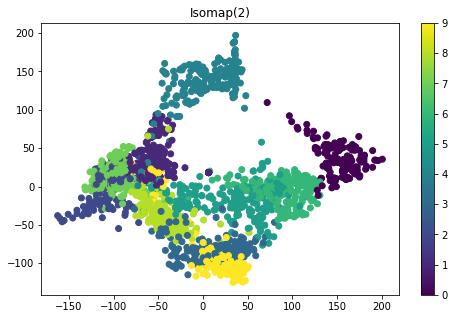

In [541]:
%%time
isomap = Isomap(n_components=2)
X_projected = isomap.fit_transform(X)
scatter_2dim(X_projected, y, 'Isomap(2)')

X.shape: (1797, 64)
X_projected.shape: (1797, 64)
accuracy_score: 0.794
silhouette_score: 0.182
homogeneity_score: 0.739
completeness_score: 0.747
v_measure_score: 0.743
CPU times: user 3.8 s, sys: 1.91 s, total: 5.7 s
Wall time: 2.87 s


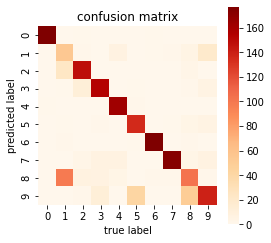

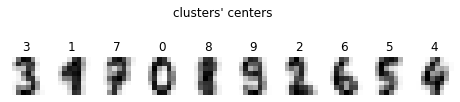

In [93]:
%%time
# KMeans
X_projected = X
km = KMeans(n_clusters=10, n_init=10)
clusters = km.fit_predict(X_projected)
show_report(X, y, X_projected, clusters)

X.shape: (1797, 64)
X_projected.shape: (1797, 30)
accuracy_score: 0.793
silhouette_score: 0.194
homogeneity_score: 0.738
completeness_score: 0.747
v_measure_score: 0.743
CPU times: user 2.77 s, sys: 1.57 s, total: 4.34 s
Wall time: 2.66 s


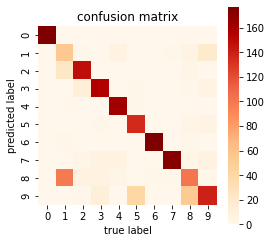

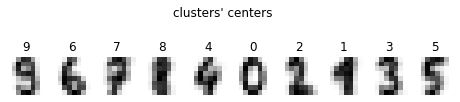

In [94]:
%%time
# PCA(30) + KMeans
pca = PCA(n_components=30).fit(X)
X_projected = pca.transform(X)
km = KMeans(n_clusters=10, n_init=10)
clusters = km.fit_predict(X_projected)
show_report(X, y, X_projected, clusters)

X.shape: (1797, 64)
X_projected.shape: (1797, 2)
accuracy_score: 0.881
silhouette_score: 0.790
homogeneity_score: 0.883
completeness_score: 0.923
v_measure_score: 0.903
CPU times: user 10.8 s, sys: 572 ms, total: 11.3 s
Wall time: 9.96 s


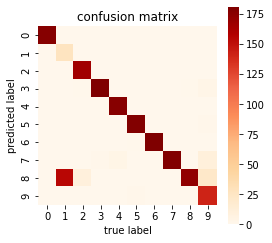

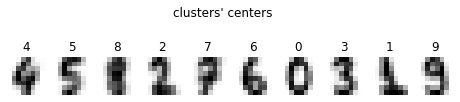

In [95]:
%%time
# UMAP(2) + KMeans
umap = UMAP(n_components=2)
X_projected = umap.fit_transform(X)
km = KMeans(n_clusters=10, n_init=10)
clusters = km.fit_predict(X_projected)
show_report(X, y, X_projected, clusters)

X.shape: (1797, 64)
X_projected.shape: (1797, 2)
accuracy_score: 0.944
silhouette_score: 0.643
homogeneity_score: 0.910
completeness_score: 0.911
v_measure_score: 0.911
CPU times: user 41.6 s, sys: 594 ms, total: 42.2 s
Wall time: 26.3 s


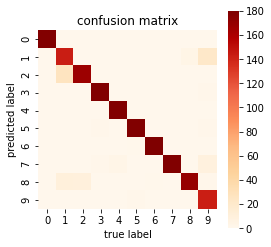

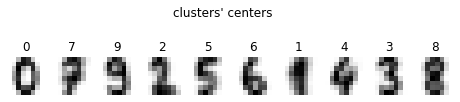

In [96]:
%%time
# t-SNE(2) + KMeans
tsne = TSNE(n_components=2)
X_projected = tsne.fit_transform(X)
km = KMeans(n_clusters=10, n_init=10)
clusters = km.fit_predict(X_projected)
show_report(X, y, X_projected, clusters)

X.shape: (1797, 64)
X_projected.shape: (1797, 2)
accuracy_score: 0.949
silhouette_score: 0.631
homogeneity_score: 0.917
completeness_score: 0.918
v_measure_score: 0.917
CPU times: user 41.1 s, sys: 687 ms, total: 41.8 s
Wall time: 25.7 s


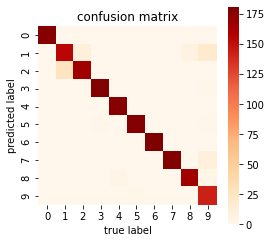

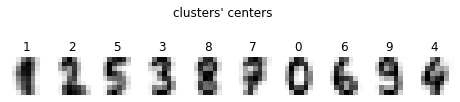

In [97]:
%%time
# t-SNE(2) + Agglomerative Clustering
tsne = TSNE(n_components=2)
X_projected = tsne.fit_transform(X)
ac = AgglomerativeClustering(n_clusters=10)
clusters = ac.fit_predict(X_projected)
show_report(X, y, X_projected, clusters)

X.shape: (1797, 64)
X_projected.shape: (1797, 2)
accuracy_score: 0.943
silhouette_score: 0.644
homogeneity_score: 0.907
completeness_score: 0.908
v_measure_score: 0.908
CPU times: user 42.5 s, sys: 1.17 s, total: 43.7 s
Wall time: 27 s


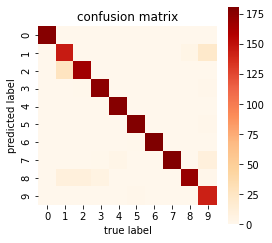

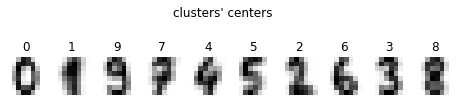

In [98]:
%%time
# PCA(40) + t-SNE(2) + KMeans
pca = PCA(n_components=40).fit(X)
X_projected = pca.transform(X)
tsne = TSNE(n_components=2)
X_projected = tsne.fit_transform(X_projected)
km = KMeans(n_clusters=10, n_init=10)
clusters = km.fit_predict(X_projected)
show_report(X, y, X_projected, clusters)

X.shape: (1797, 64)
X_projected.shape: (1797, 2)
accuracy_score: 0.688
silhouette_score: 0.453
homogeneity_score: 0.670
completeness_score: 0.718
v_measure_score: 0.693
CPU times: user 5.09 s, sys: 1.51 s, total: 6.6 s
Wall time: 4.84 s


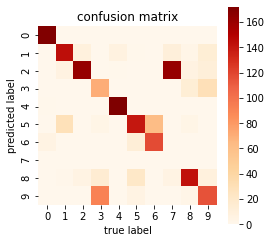

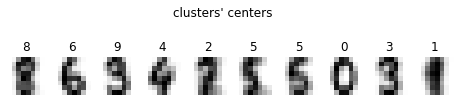

In [99]:
%%time
# Isomap(2) + KMeans
isomap = Isomap(n_components=2)
X_projected = isomap.fit_transform(X)
km = KMeans(n_clusters=10, n_init=10)
clusters = km.fit_predict(X_projected)
show_report(X, y, X_projected, clusters)

X.shape: (1797, 64)
X_projected.shape: (1797, 2)
accuracy_score: 0.687
silhouette_score: 0.428
homogeneity_score: 0.645
completeness_score: 0.703
v_measure_score: 0.673
CPU times: user 2.83 s, sys: 557 ms, total: 3.39 s
Wall time: 3 s


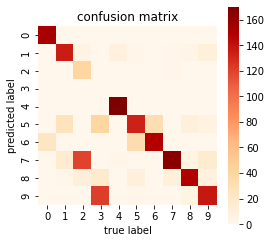

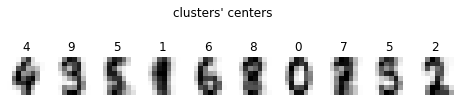

In [100]:
%%time
# Isomap(2) + Agglomerative Clustering
isomap = Isomap(n_components=2)
X_projected = isomap.fit_transform(X)
ac = AgglomerativeClustering(n_clusters=10)
clusters = ac.fit_predict(X_projected)
show_report(X, y, X_projected, clusters)

X.shape: (1797, 64)
X_projected.shape: (1797, 2)
accuracy_score: 0.951
silhouette_score: 0.650
homogeneity_score: 0.921
completeness_score: 0.922
v_measure_score: 0.921
CPU times: user 42.9 s, sys: 572 ms, total: 43.4 s
Wall time: 26.8 s


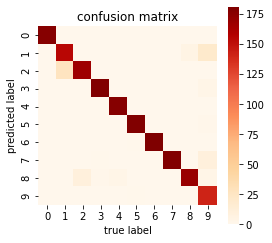

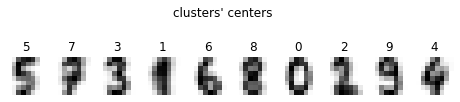

In [102]:
%%time
# t-SNE(2) + GMM
tsne = TSNE(n_components=2)
X_projected = tsne.fit_transform(X)
gmm = GaussianMixture(n_components=10)
clusters = gmm.fit_predict(X_projected)
show_report(X, y, X_projected, clusters)

In [103]:
# t-SNE(2) + DBSCAN
tsne = TSNE(n_components=2)
X_projected = tsne.fit_transform(X)

In [105]:
dbscan = DBSCAN(eps=8, min_samples=10)
clusters = dbscan.fit_predict(X_projected) 
print(np.unique(clusters), np.sum(clusters == -1))
# show_report(X[clusters!=-1], y[clusters!=-1], X_projected[clusters!=-1], clusters[clusters!=-1])

[0 1 2 3 4 5 6 7 8] 0
